In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
# get dataset from keras.datasets
mnist = tf.keras.datasets.fashion_mnist

In [3]:
#load data
(training_images,training_labels), (test_images, test_labels) = mnist.load_data()

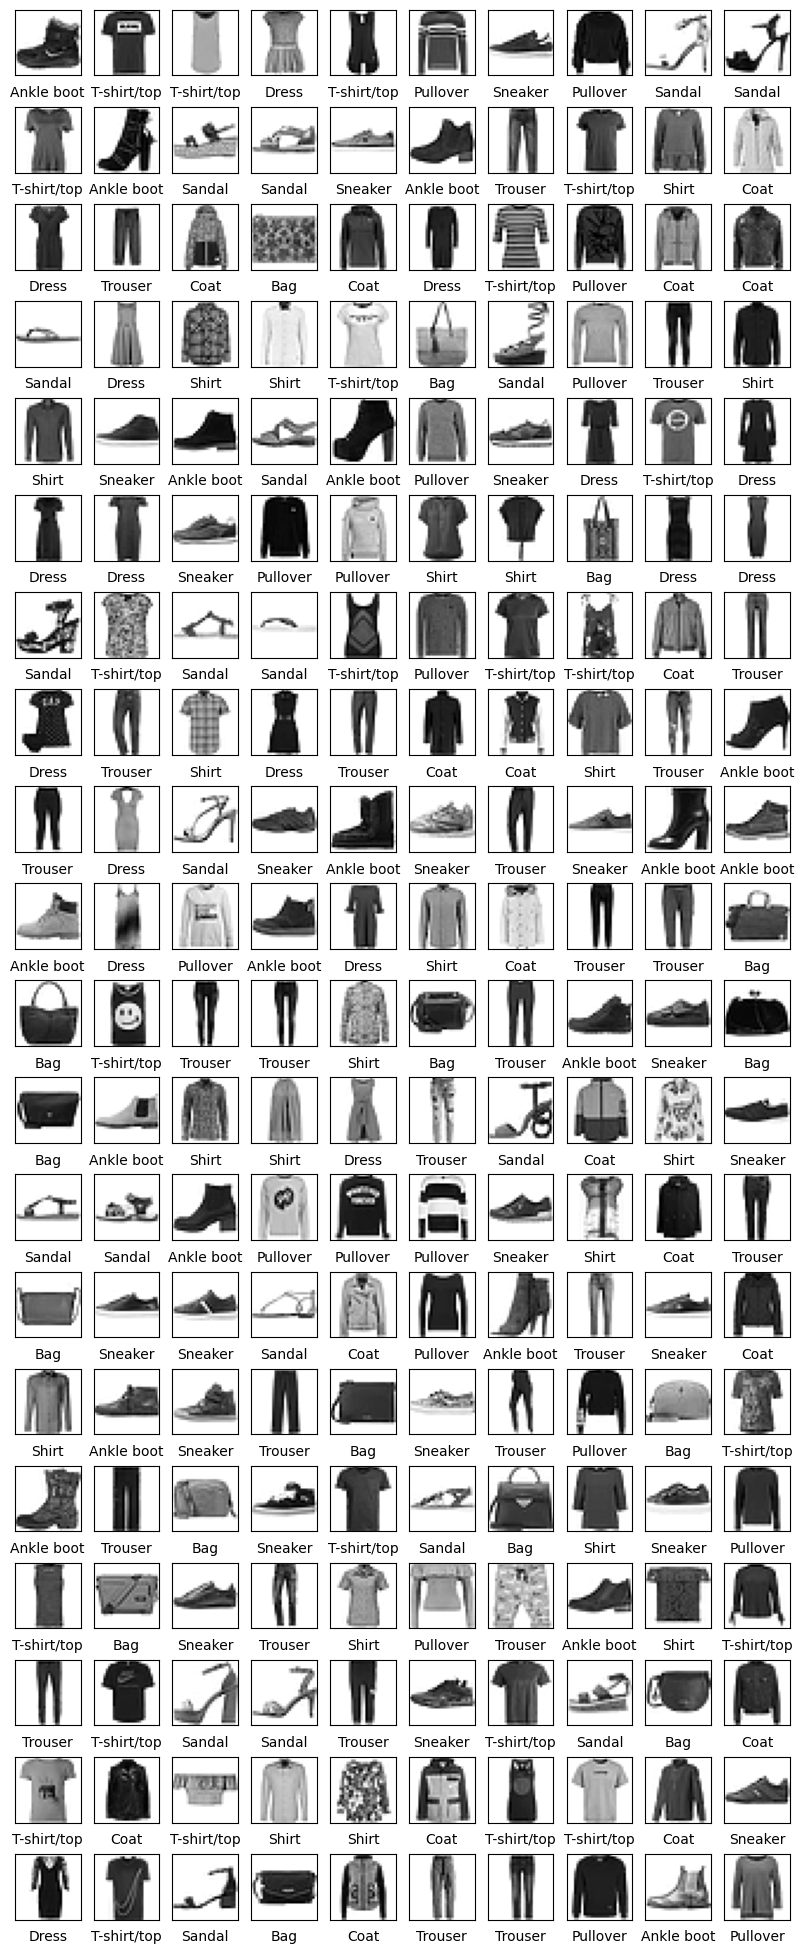

In [4]:
import matplotlib.pyplot as plt

# from documentation
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Create a figure with a grid of images
plt.figure(figsize=(10, 25))
for i in range(200):
    plt.subplot(20, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(training_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[i]])

# Show the plot
plt.show()

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

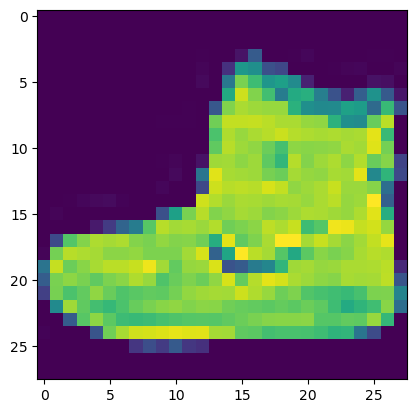

In [5]:
# data for item [0]
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  82 187
   26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0   0 179 240 237
  255 240 139  83  64  43  60  54   0   1]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0  58 239 222 234
  238 246 252 254 255 248 255 187   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   3   0   0 194 

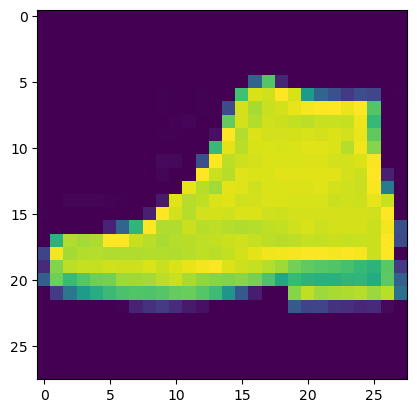

In [6]:
# data for item[42]
plt.imshow(training_images[42])
print(training_labels[42])
print(training_images[42])

Integers are between 0 to 255. <br>
Performing normalization which brings all values to 0 or 1 <br>
<b>Normalization</b>, reduces the complexity of your model, increases accuracy and speed up training.

In [7]:
training_images = training_images/255.0
test_images = test_images/255.0

9
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.  

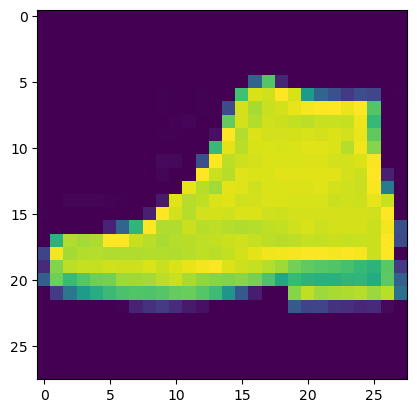

In [8]:
# POST NORMALIZATION data for item[42]
plt.imshow(training_images[42])
print(training_labels[42])
print(training_images[42])

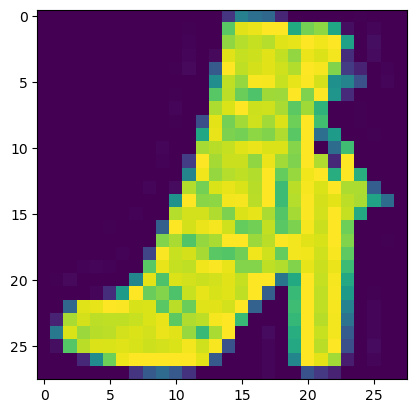

In [9]:
plt.imshow(training_images[11])

<b>Model Design</b> <br>
Model with three layers <br>
<li>Sequential - Defines a sequence of layers in neural network</li>
<li>Flatten - takes square and turns it into a one-dimensional vectors</li>
<li>Dense - Adds a layer of neurons</li>
<li>Activation - Tells the layer what to do</li>
<ul>Relu - If X is greater than 0 return X, else 0. Passes on 0 or 1 to its next layer.</ul>
<ul>Softmax - takes set of values and picks the biggest one. 
    <ul>output - [0.1,0.1,0.05,9.5] returns - [0,0,0,1]</ul>
</ul>

In [10]:
model = tf.keras.models.Sequential([ tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

<b>Compile and Train Model</b><br>
- Compile with optimizer and loss function.<br>
- Then train model on training data and labels.<br>
- Make predictions.<br>
    - metrics =, allows TF to report the accuracy of training data by checking predicted results

In [11]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 21s 10ms/step - loss: 0.4758 - accuracy: 0.8304
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3584 - accuracy: 0.8669
Epoch 3/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3224 - accuracy: 0.8819
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2995 - accuracy: 0.8898
Epoch 5/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2797 - accuracy: 0.8960


<b>Model Testing</b><br>
model.evaluate, it reports the loss for each.

In [12]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 4ms/step - loss: 0.3267 - accuracy: 0.8820


[0.326724112033844, 0.8820000290870667]

In [13]:
classifications = model.predict(test_images)
print(classifications[0])

313/313 [==============================] - 1s 4ms/step
[8.79711388e-06 5.78231720e-07 2.51285996e-06 1.04678534e-07
 4.80268091e-06 6.90822443e-03 9.25136465e-06 4.59500216e-02
 5.42865791e-06 9.47110295e-01]


In [21]:
lbl = test_labels[0]
print(lbl)
print(class_names[lbl])

9
Ankle boot


As per labels 9 is Ankel Boots

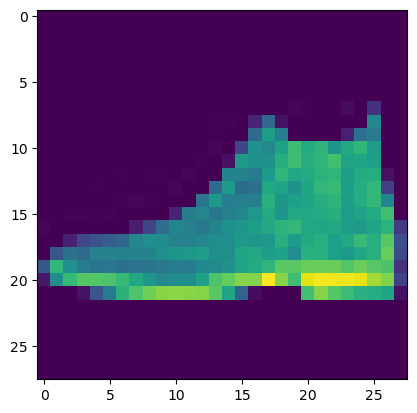

In [22]:
plt.imshow(test_images[0])

In [ ]:
# Callbacks if desired accuracy is achieved
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])